In [64]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import collections
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

## 3. Exploratory Data Analysis

In the first section titled 'Hypothesis Generation', I made an effort to predict how different features might be linked to loan approval. Some of these hypotheses are:

- Applicants with high income in comparison to the loan amount
- Having a co-applicant with a relatively high income
- Being married
- Having a small number of dependents
- Being a graduate
- Not being self-employed
- Owning a property in an urban or semi-urban area
- Having a credit history

In this section, I will investigate some of these hypotheses and draw conclusions about the dataset, along with making other inferences.

In [54]:
df = pd.read_csv('../data/data_preprocessed.csv')
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,Graduate,SelfEmployed,CreditHistory,LoanApproval,Gender_Female,Gender_Male,...,Married_No,Married_Unknown,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,PropertyArea_Rural,PropertyArea_Semiurban,PropertyArea_Urban
0,45830.0,15080.0,128000.0,360,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1,30000.0,0.0,66000.0,360,1,1,1,1,0,1,...,0,0,1,1,0,0,0,0,0,1
2,25830.0,23580.0,120000.0,360,0,0,1,1,0,1,...,0,0,1,1,0,0,0,0,0,1
3,60000.0,0.0,141000.0,360,1,0,1,1,0,1,...,1,0,0,1,0,0,0,0,0,1
4,54170.0,41960.0,267000.0,360,1,1,1,1,0,1,...,0,0,1,0,0,1,0,0,0,1


**CreditHistory** has the strongest positive correlation with LoanApproval (0.567105).
**PropertyArea_rural** has the most negative correlation wrt LoanApproval (-0.109203).

Negative correlations wrt Loan Approval:
- LoanAmount               -0.018536
- LoanAmountTerm           -0.033173
- SelfEmployed             -0.005660 (closest to 0)
- Gender_Female            -0.055320
- Gender_Unknown           -0.074998
- Married_No               -0.083304
- Dependents_0             -0.011764
- Dependents_1             -0.037075
- PropertyArea_Rural       -0.109203 (most negative)
- PropertyArea_Urban       -0.027789

Positive correlations wrt Loan Approval:
- ApplicantIncome           0.006396 
- CoapplicantIncome         0.066459
- Graduate                  0.099686
- CreditHistory             0.567105 (most positive)
- Gender_Male               0.077791
- Married_Unknown           0.040590
- Married_Yes               0.077816
- Dependents_2              0.047410
- Dependents_3              0.005173 (closest to 0)
- PropertyArea_Semiurban    0.129037

People who are approved for loans are most likely to: have coapplicants with high income, be a graduate, have a credit history, be male, be married/unknown, have two children and live in the suburbs.

Those who aren't approved tend to: ask for a large loan and long terms, are female/unknown gender, aren't married, have none or 1 child, and live in a rural or urban area. 

Interestingly, ApplicantIncome has only a very weak positive correlation with LoanApproval.

In [55]:
corr_matrix = df.corr()
loan_approval_corr = corr_matrix['LoanApproval']
print(loan_approval_corr)

ApplicantIncome           0.006396
CoapplicantIncome         0.066459
LoanAmount               -0.018536
LoanAmountTerm           -0.033173
Graduate                  0.099686
SelfEmployed             -0.005660
CreditHistory             0.567105
LoanApproval              1.000000
Gender_Female            -0.055320
Gender_Male               0.077791
Gender_Unknown           -0.074998
Married_No               -0.083304
Married_Unknown           0.040590
Married_Yes               0.077816
Dependents_0             -0.011764
Dependents_1             -0.037075
Dependents_2              0.047410
Dependents_3              0.005173
PropertyArea_Rural       -0.109203
PropertyArea_Semiurban    0.129037
PropertyArea_Urban       -0.027789
Name: LoanApproval, dtype: float64


Features with a p-value < 5 with LoanApproval are Graduate (0.023) and PropertyArea_Semiurban (0.003), CreditHistory (0.000) and PropertyArea_Rural (0.013).
This implies that their correlations with LoanApproval is statistically significant.

Going back to my list of hypothesis of who gets loan approvals, I can accept/reject some of them based on the information I have currently:
- Applicants with high income in comparison to the loan amount UNSURE 
- Having a co-applicant with a relatively high income UNSURE 
- Being married UNSURE
- Having a small number of dependents UNSURE
- **Being a graduate ACCEPT**
- Not being self-employed UNSURE 
- **Owning a property in a semi-urban area ACCEPT**
- **Having a credit history ACCEPT**


In [56]:
# Select columns of interest
cols_of_interest = ['LoanApproval', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmountTerm', 'Graduate', 'SelfEmployed', 'CreditHistory', 'Gender_Female', 'Gender_Male', 'Gender_Unknown', 'Married_No', 'Married_Unknown', 'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3', 'PropertyArea_Rural', 'PropertyArea_Semiurban', 'PropertyArea_Urban']

# Loop over columns and calculate correlations and p-values
for col in cols_of_interest:
    corr, pval = pearsonr(df[col], df['LoanApproval'])
    if pval < 0.05:
        print(f"Correlation between '{col}' and 'LoanApproval': {corr:.3f}, p-value: {pval:.3f}")


Correlation between 'LoanApproval' and 'LoanApproval': 1.000, p-value: 0.000
Correlation between 'Graduate' and 'LoanApproval': 0.100, p-value: 0.023
Correlation between 'CreditHistory' and 'LoanApproval': 0.567, p-value: 0.000
Correlation between 'PropertyArea_Rural' and 'LoanApproval': -0.109, p-value: 0.013
Correlation between 'PropertyArea_Semiurban' and 'LoanApproval': 0.129, p-value: 0.003


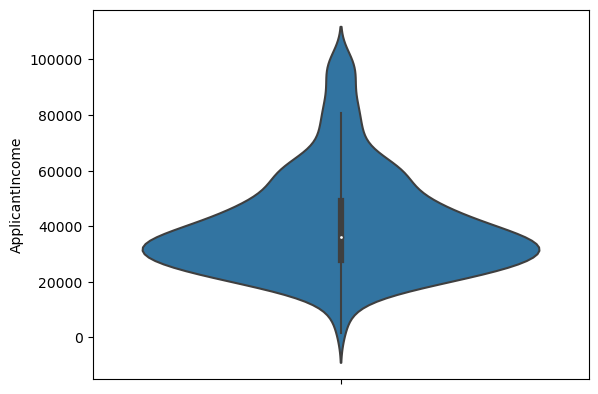

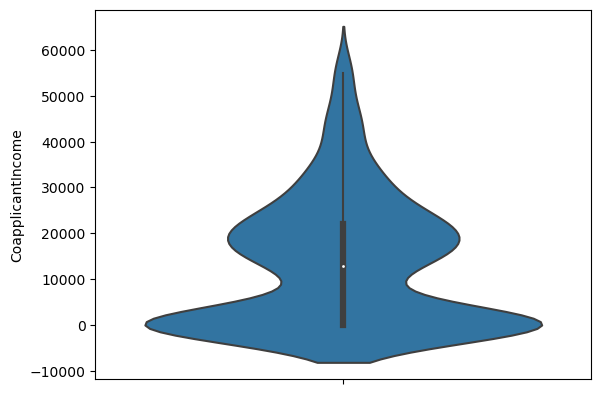

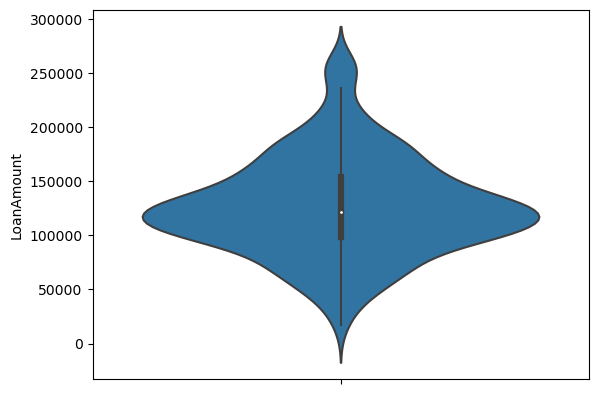

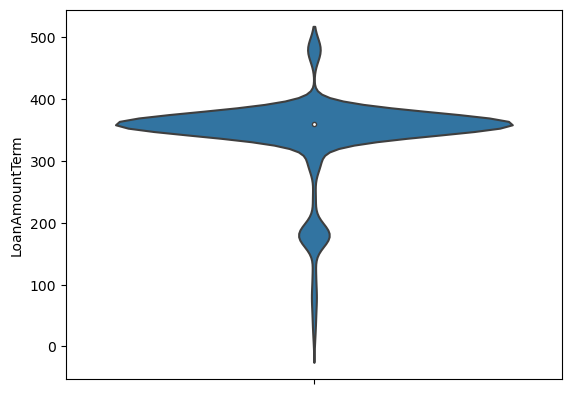

In [57]:
# Create a separate plot for each column
sns.violinplot(y=df['ApplicantIncome'])
plt.show()

sns.violinplot(y=df['CoapplicantIncome'])
plt.show()

sns.violinplot(y=df['LoanAmount'])
plt.show()

sns.violinplot(y=df['LoanAmountTerm'])
plt.show()

Most loan applicants are graduates, have a credit history, are approved for loans, are male and married, have no children, and live in semi-urban areas. 

In [58]:
# Select columns of interest
cols_of_interest = ['Graduate', 'SelfEmployed', 'CreditHistory', 'LoanApproval', 'Gender_Female', 'Gender_Male', 'Gender_Unknown', 'Married_No', 'Married_Unknown', 'Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3', 'PropertyArea_Rural', 'PropertyArea_Semiurban', 'PropertyArea_Urban']

# Loop over columns and count number of 1s
for col in cols_of_interest:
    num_ones = df[col].value_counts()[1]
    pct_ones = (num_ones / len(df)) * 100
    print(f"{col}: {num_ones} ({pct_ones:.2f}%)")

Graduate: 393 (76.02%)
SelfEmployed: 59 (11.41%)
CreditHistory: 443 (85.69%)
LoanApproval: 363 (70.21%)
Gender_Female: 97 (18.76%)
Gender_Male: 411 (79.50%)
Gender_Unknown: 9 (1.74%)
Married_No: 180 (34.82%)
Married_Unknown: 2 (0.39%)
Married_Yes: 335 (64.80%)
Dependents_0: 311 (60.15%)
Dependents_1: 80 (15.47%)
Dependents_2: 88 (17.02%)
Dependents_3: 38 (7.35%)
PropertyArea_Rural: 155 (29.98%)
PropertyArea_Semiurban: 201 (38.88%)
PropertyArea_Urban: 161 (31.14%)


In [59]:
df_scaled = df.copy()

# Create feature matrix X by selecting columns of interest
cols_of_interest = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmountTerm']
X = df_scaled[cols_of_interest]

# Create scaler and fit to X
scaler = MinMaxScaler()
scaler.fit(X)

# Transform X using scaler
X_scaled = scaler.transform(X)

# Replace original columns with scaled data
df_scaled[cols_of_interest] = X_scaled

In [61]:
df_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,Graduate,SelfEmployed,CreditHistory,LoanApproval,Gender_Female,Gender_Male,...,Married_No,Married_Unknown,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3,PropertyArea_Rural,PropertyArea_Semiurban,PropertyArea_Urban
0,0.443788,0.264515,0.461240,0.74359,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
1,0.285314,0.000000,0.220930,0.74359,1,1,1,1,0,1,...,0,0,1,1,0,0,0,0,0,1
2,0.243568,0.413612,0.430233,0.74359,0,0,1,1,0,1,...,0,0,1,1,0,0,0,0,0,1
3,0.585644,0.000000,0.511628,0.74359,1,0,1,1,0,1,...,1,0,0,1,0,0,0,0,0,1
4,0.527280,0.736011,1.000000,0.74359,1,1,1,1,0,1,...,0,0,1,0,0,1,0,0,0,1


##### Nearly all of the data's variance can be explained by the first 15 principle components. More than 90% of the variance is explained by the first 10 PC's. 

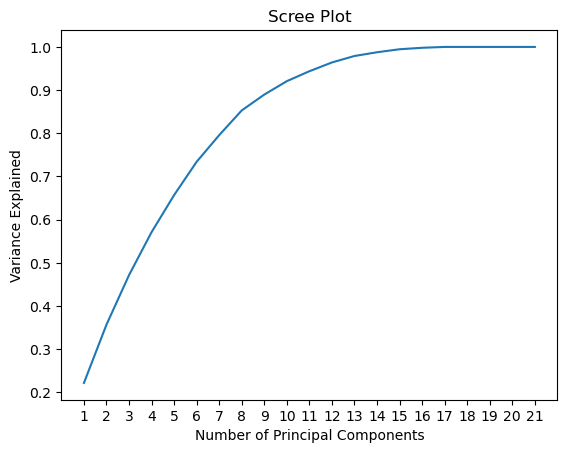

In [63]:
pca = PCA()
pca.fit(df_scaled)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.show()

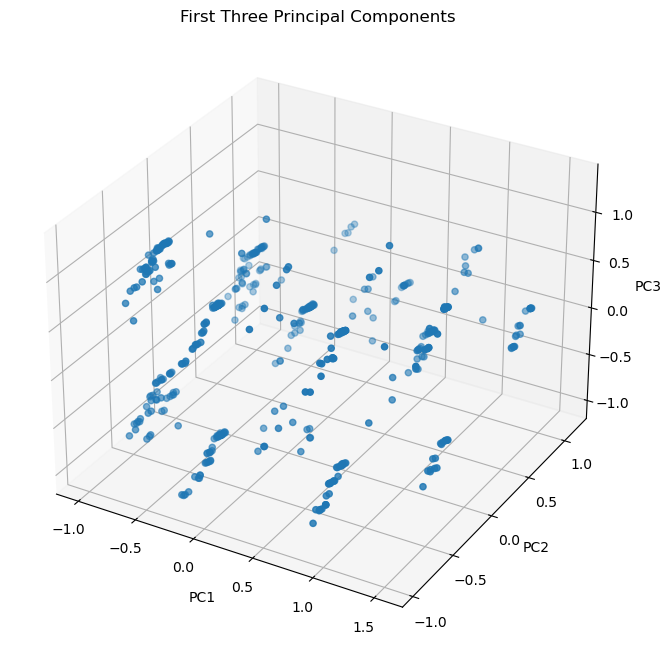

In [67]:
pca = PCA(n_components=3)
pca.fit(df_scaled)
X_pca = pca.transform(df_scaled)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], s=20)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('First Three Principal Components')
plt.show()